# Case Study - Titanic


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/femail |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_titanic = pd.read_csv(r'C:\Users\MICHAEL\Desktop\School\Azubi Africa\Course\Exercises\3 Analytics with Python\Week 7\casestudy_titanic-231005-181053.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [7]:
#Filling the missing age values with mode maintains the same summary statistics as the original dataset
mode = df_titanic['Age'].mode()[0]
df_titanic['Age'].fillna(value = mode , inplace = True)

#Drop the cabin column
df_titanic.drop('Cabin', axis = 1 , inplace = True)

#Filled "Embarked" nulls with S, as it had majority of passengers
df_titanic['Embarked'].fillna(value = 'S' , inplace = True)

df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Missing Values

1. *Age:*
   - Non-null Count: 714
   - Missing Values: 891 - 714 = 177
   - Discussion: Filled the nulls with the mode of age

2. *Cabin:*
   - Non-null Count: 204
   - Missing Values: 891 - 204 = 687
   - Discussion: Dropped the whole column bbecause it had many nulls and didn't have any effect of our dataset if dropped.

3. *Embarked:*
   - Non-null Count: 889
   - Missing Values: 891 - 889 = 2
   - Discussion: There are only 2 missing values in the 'Embarked' column. This suggests that the port of embarkation is missing for two passengers.

##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [9]:
# Remove '$' from Fare and convert to float
df_titanic['Fare'] = df_titanic['Fare'].replace('[\$,]', '', regex=True).astype(float).round(2)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [11]:
# Display statistics of numeric columns
numeric_columns = ['Age', 'SibSp', 'Fare', 'Parch', 'Survived']
numeric_col_description = df_titanic[numeric_columns].describe()
numeric_col_description

,Age,SibSp,Fare,Parch,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,28.566970,0.523008,32.205017,0.381594,0.383838
std,13.199572,1.102743,49.693389,0.806057,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,7.915000,0.000000,0.000000
50%,24.000000,0.000000,14.450000,0.000000,0.000000
75%,35.000000,1.000000,31.000000,0.000000,1.000000
max,80.000000,8.000000,512.330000,6.000000,1.000000


##### Discussion:

Age:
Count: 891
Mean: 28.57
Standard Deviation: 13.19
Min: 0.42
25th Percentile: 22
Median (50th Percentile): 24
75th Percentile: 35.00
Max: 80.00

The 'Age' column represents the ages of passengers.
The mean age is approximately 28.57, indicating the average age of passengers.
The standard deviation of 13.19 suggests a moderate spread or dispersion in ages.
The minimum age is 0.42 (fractional, possibly an infant), and the maximum age is 80.00.


SibSp (Number of Siblings/Spouses Aboard):
Count: 891
Mean: 0.52
Standard Deviation: 1.10
Min: 0
25th Percentile: 0
Median (50th Percentile): 0
75th Percentile: 1
Max: 8

'SibSp' represents the count of siblings/spouses a passenger had aboard the Titanic.
The average number of siblings/spouses is 0.52, indicating that, on average, passengers did not have many siblings or spouses aboard.
The standard deviation of 1.10 suggests some variability in the number of siblings/spouses.

Parch (Number of Parents/Children Aboard):
Count: 891
Mean: 0.38
Standard Deviation: 0.81
Min: 0
25th Percentile: 0
Median (50th Percentile): 0
75th Percentile: 0
Max: 6

'Parch' represents the count of parents/children a passenger had aboard the Titanic.
The average number of parents/children is 0.38, indicating that, on average, passengers did not have many parents or children aboard.
The standard deviation of 0.81 suggests some variability in the number of parents/children.

Fare:
Count: 891
Mean: 32.20
Standard Deviation: 49.69
Min: 0.00
25th Percentile: 7.92
Median (50th Percentile): 14.45
75th Percentile: 31.00
Max: 512.33

'Fare' represents the passenger fare or ticket price.
The mean fare is 32.20, indicating the average ticket price.
The standard deviation of 49.69 suggests a wide range in ticket prices.
The minimum fare is 0.00, which might indicate some missing or free tickets.
The maximum fare is 512.33, indicating a high fare for some passengers.

Survived:
Count: 891
Mean: 0.38
Standard Deviation: 0.49
Min: 0
25th Percentile: 0
Median (50th Percentile): 0
75th Percentile: 1
Max: 1

'Survived' is a binary variable (0 or 1) indicating whether a passenger survived or perished.
The mean of 0.38 indicates that, on average, about 38.38% of passengers in the dataset survived.
The standard deviation of 0.49 suggests some variability in survival outcomes.

### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

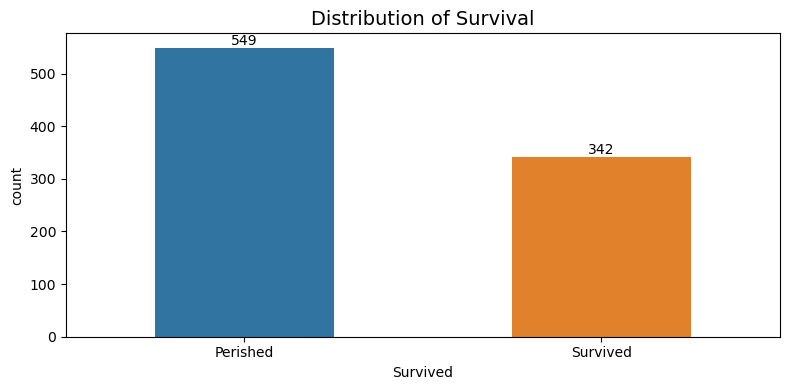

In [13]:
# Plot bar chart for Survived column with count numbers and custom labels
plt.figure(figsize=(8, 4))  # Adjust the overall size of the graph
ax4 = sns.countplot(x='Survived', data=df_titanic, width=0.5)  # Adjust width as needed

# Replace numeric labels with custom labels
ax4.set_xticks([0, 1])
ax4.set_xticklabels(['Perished', 'Survived'])

# Add count numbers on top of each bar with adjusted position and font size
for p in ax4.patches:
    ax4.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Add title and adjust layout
ax4.set_title('Distribution of Survival', fontsize=14)
plt.tight_layout()

plt.show()

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Female Passengers

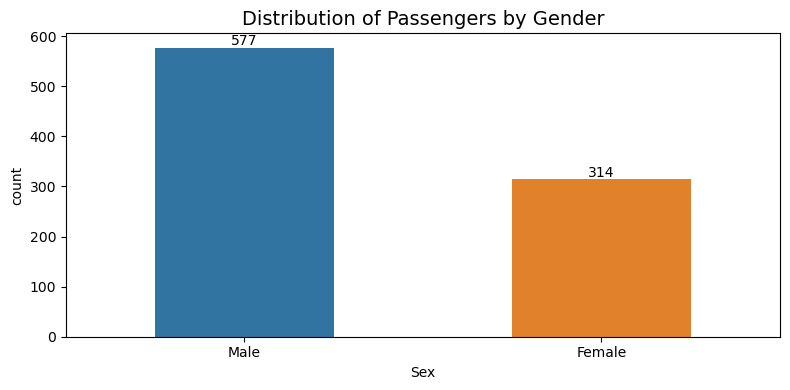

In [15]:
# Plot bar chart for Sex with custom labels and count numbers
plt.figure(figsize=(8, 4))  # Adjust the overall size of the graph
ax5 = sns.countplot(x='Sex', data=df_titanic, width=0.5)  # Adjust width as needed

# Replace numeric labels with custom labels
ax5.set_xticks([0, 1])
ax5.set_xticklabels(['Male', 'Female'])

# Add count numbers on top of each bar with adjusted position and font size
for p in ax5.patches:
    ax5.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Add title and adjust layout
ax5.set_title('Distribution of Passengers by Gender', fontsize=14)
plt.tight_layout()

plt.show()

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [17]:
#Survival rate by Gender
gndr_survived = df_titanic.groupby('Sex')['Survived'].sum()
gndr = df_titanic['Sex'].value_counts()
survival_rate = (gndr_survived/gndr)*100
pd.DataFrame(survival_rate).reset_index()
survival_rate

Sex
female    74.203822
male      18.890815
dtype: float64

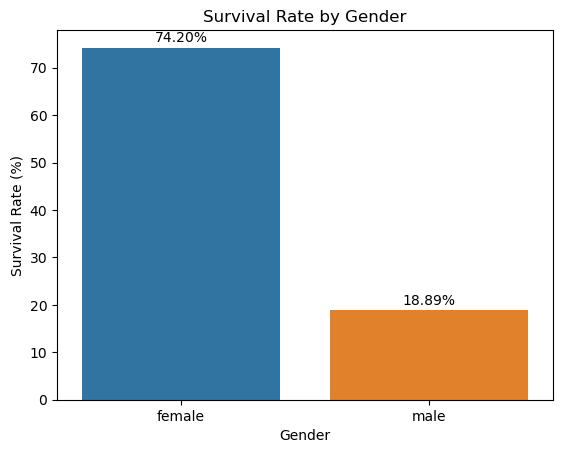

In [26]:
# Calculate survival rate by gender
gndr_survived = df_titanic.groupby('Sex')['Survived'].sum()
gndr = df_titanic['Sex'].value_counts()
survival_rate = (gndr_survived / gndr) * 100

# Create a DataFrame for visualization
df_survival_rate = pd.DataFrame({'Gender': survival_rate.index, 'Survival Rate (%)': survival_rate.values})

# Plot the bar chart with annotations
ax = sns.barplot(x='Gender', y='Survival Rate (%)', data=df_survival_rate)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')

# Add annotations with percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()

##### Task7: Plot Perished vs. Survived Bar for Male and Female
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

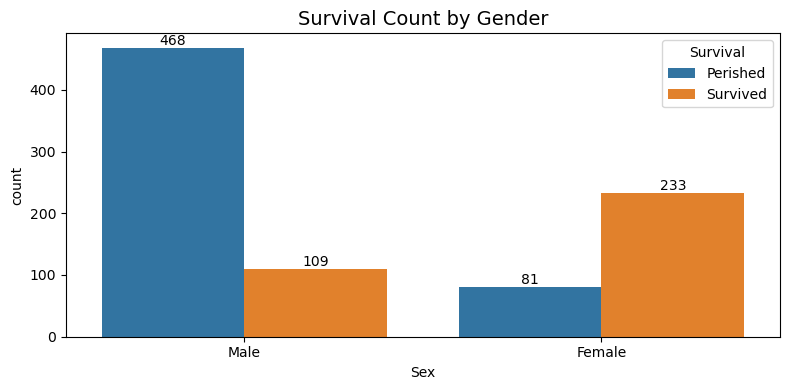

In [28]:
# Plot Perished vs. Survived Bar for Male and Female
plt.figure(figsize=(8, 4))  # Adjust the overall size of the graph
ax7 = sns.countplot(x='Sex', hue='Survived', data=df_titanic)

# Replace numeric labels with custom labels
ax7.set_xticks([0, 1])
ax7.set_xticklabels(['Male', 'Female'])

# Replace legend labels
ax7.legend(title='Survival', labels=['Perished', 'Survived'])

# Add count numbers on top of each bar with adjusted position and font size
for p in ax7.patches:
    ax7.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Add title and adjust layout
ax7.set_title('Survival Count by Gender', fontsize=14)
plt.tight_layout()

plt.show()

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [30]:
#Survival rate by Pclass
Pclass_survived = df_titanic.groupby('Pclass')['Survived'].sum()
Pclass = df_titanic['Pclass'].value_counts()
survival_rate =Pclass_survived/Pclass*100
df = pd.DataFrame({'Survival Rate': survival_rate.round(2).astype(str) + '%'})
df

,Survival Rate
Pclass,
1,62.96%
2,47.28%
3,24.24%


##### Task 9: Plot Perished vs. Survived for each Pclass

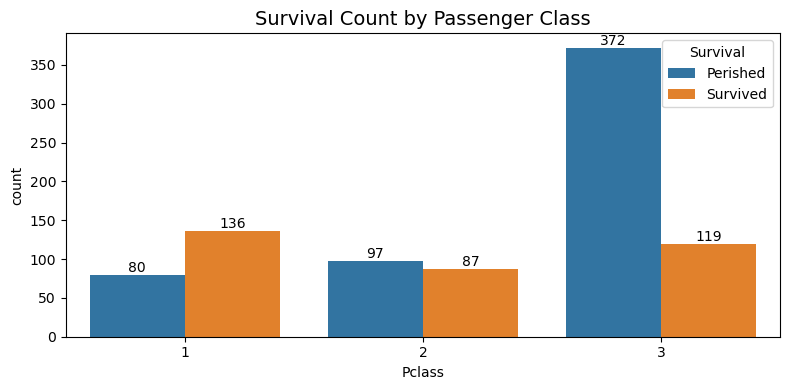

In [32]:
# Plot Perished vs. Survived for each Pclass
plt.figure(figsize=(8, 4))  # Adjust the overall size of the graph
ax9 = sns.countplot(x='Pclass', hue='Survived', data=df_titanic)

# Replace legend labels
ax9.legend(title='Survival', labels=['Perished', 'Survived'])

# Add count numbers on top of each bar with adjusted position and font size
for p in ax9.patches:
    ax9.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Add title and adjust layout
ax9.set_title('Survival Count by Passenger Class', fontsize=14)
plt.tight_layout()

plt.show()

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

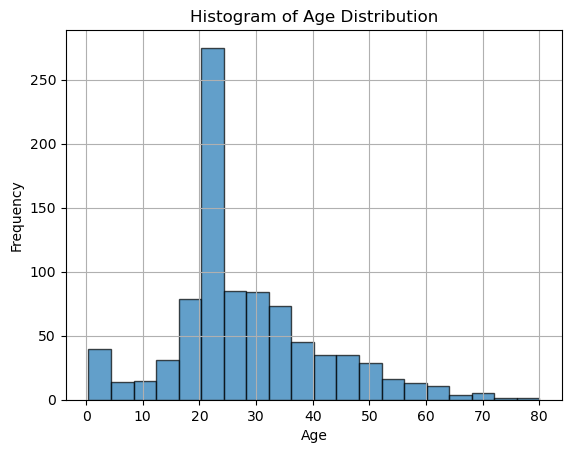

In [34]:
# Plot histogram for Age
df_titanic['Age'].hist(bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')

plt.show()

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

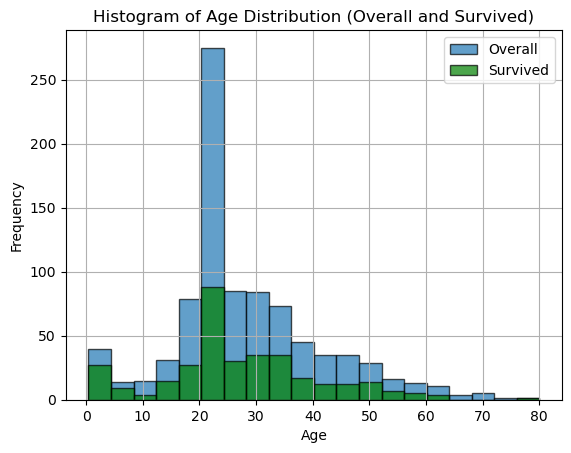

In [36]:
# Plot histogram for Age
df_titanic['Age'].hist(bins=20, edgecolor='black', alpha=0.7, label='Overall')

# Filter out survived passengers
survived_age = df_titanic[df_titanic['Survived'] == 1]['Age']

# Plot histogram for survived passengers on the same axis
survived_age.hist(bins=20, edgecolor='black', alpha=0.7, color='green', label='Survived')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Overall and Survived)')

# Add legend
plt.legend()

plt.show()

Children have higher survival rate.

[Back to Top](#Table-of-Contents)
